In [39]:
import pandas as pd
import numpy as np
# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import bs4
# Create a simple importable Python module which will produce parsed WHOIS data for a given domain.
# Able to extract data for all the popular TLDs (com, org, net, …)
# Query a WHOIS server directly instead of going through an intermediate web service like many others do.
# Works with Python 2 & 3
import whois

In [40]:
df=pd.read_csv("malicious_phish.csv")
df.head(20)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [41]:
df.shape

(651191, 2)

In [42]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [43]:
df.head(20)

,url,type,use_of_ip
0,br-icloud.com.br,phishing,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


In [44]:
df.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [45]:
from urllib.parse import urlparse




def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [46]:
df.head(5)

,url,type,use_of_ip,abnormal_url
0,br-icloud.com.br,phishing,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1


In [47]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

,url,type,use_of_ip,abnormal_url,count.
0,br-icloud.com.br,phishing,0,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2


In [48]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))

In [49]:
df.head(5)

,url,type,use_of_ip,abnormal_url,count.,count-www,count@
0,br-icloud.com.br,phishing,0,0,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0


In [50]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [51]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

In [52]:
df.head(5)

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0


In [53]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [54]:
df.head(5)

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0


In [55]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [56]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))


df['url_length'] = df['url'].apply(lambda i: len(str(i)))

df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [57]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [58]:

#typically tell a story about the domain name associated with it
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [59]:
#Length of Top Level Domain
#fail_silently: If set to True, no exceptions are raised and None is returned on failure.
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [60]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [61]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [62]:
df.head(20)

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count-,count=,url_length,hostname_length,sus_url,fd_length,tld,tld_length,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,...,1,0,16,0,0,0,None,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,...,0,0,35,0,0,5,None,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,...,0,0,31,0,0,7,None,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,...,1,4,88,21,0,9,be,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,...,1,3,235,23,0,9,net,3,22,199
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,1,2,0,0,3,0,0,...,16,0,118,11,0,1,net,3,1,93
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,2,0,0,6,0,0,...,1,0,45,0,0,3,None,-1,4,31
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,0,1,0,0,1,0,1,...,2,1,46,0,0,0,None,-1,0,40
8,http://www.pashminaonline.com/pure-pashminas,defacement,0,1,2,1,0,1,0,0,...,1,0,44,22,0,14,com,3,0,37
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,0,1,0,0,2,0,0,...,4,0,45,0,0,5,None,-1,5,33


In [63]:
df["tld"].unique()

array([None, 'be', 'net', 'com', 'nl', 'de', 'hu', 'co', 'it', 'ac.uk',
       'com.br', 'ir', 'org', 'pl', 'gr', 'ru', 'com.ua', 'info', 'vn',
       'ro', 'cl', 'com.ar', 'ca', 'sk', 'es', 'co.uk', 'si', 'biz',
       'net.br', 'ind.br', 'kiev.ua', 'net.vn', 'cc', 'at', 'tv', 'eu',
       'cn', 'com.vn', 'com.my', 'cz', 'com.au', 'jp', 'dk', 'fr',
       'co.za', 'lt', 'md', 'fi', 'blogspot.com', 'co.id', 'edu.co',
       'com.tr', 'in', 'org.au', 'se', 'ch', 'com.pl', 'ee', 'com.sg',
       'us', 'bn.it', 'com.cn', 'gov.br', 'ph', 'mx', 'co.kr', 'net.ua',
       'k12.tr', 'gov.uk', 'com.gr', 'asia', 'co.th', 'ua', 'info.pl',
       'com.mx', 'no', 'pt', 'co.zw', 'ie', 'co.nz', 'kz', 'org.uk', 'nu',
       'eu.com', 'is', 'nhs.uk', 'lu', 'edu.pe', 'rs', 'com.cy', 'uz',
       'org.cn', 'org.za', 'pe', 'pk', 'in.ua', 'gov.gr', 'org.br',
       'is-a-libertarian.com', 'com.co', 'com.ba', 'com.bo', 'cv',
       'ab.ca', 'travel.pl', 'com.pe', 'altervista.org', 'io', 'to', 'az',
       '

In [64]:
df.drop("tld",1)

C:\Users\Shashank\AppData\Local\Temp\ipykernel_2388\3658352431.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop("tld",1)


,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,...,1,1,4,88,21,0,9,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,...,1,1,3,235,23,0,9,3,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,0,3,0,0,3,0,0,...,0,0,0,39,0,0,7,-1,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,0,2,0,0,4,0,1,...,0,2,0,44,0,0,8,-1,7,29
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,0,2,1,0,4,0,1,...,0,0,0,42,0,0,7,-1,3,33
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,2,0,0,2,0,0,...,0,0,0,45,0,0,4,-1,0,36


In [65]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

In [66]:
df.to_csv("parsed_url_project.csv")

In [67]:
print(df.columns.tolist())

['url', 'type', 'use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length', 'hostname_length', 'sus_url', 'fd_length', 'tld', 'tld_length', 'count-digits', 'count-letters', 'type_code']


In [68]:
# independent variables 
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#dependant variable(target)
y = df['type_code']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [70]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred))

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

c:\Python39\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.96      0.99      0.98     19292
           2       0.97      0.90      0.93      6504
           3       0.90      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.959


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
print(classification_report(y_test,y_pred))

score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85621
           1       0.90      0.97      0.93     19292
           2       0.94      0.77      0.85      6504
           3       0.88      0.74      0.80     18822

    accuracy                           0.94    130239
   macro avg       0.92      0.87      0.89    130239
weighted avg       0.94      0.94      0.93    130239

accuracy:   0.937


In [72]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


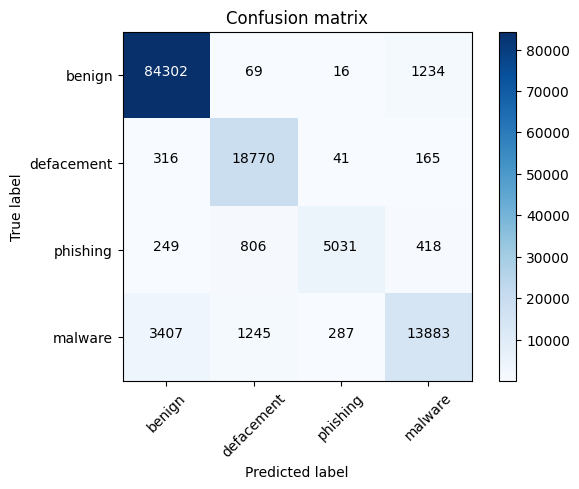

In [73]:
cm =confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
import itertools
plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])

In [74]:
import pickle 

with open ('Detect_URL_lgm','wb') as f:
    pickle.dump(LGB_C,f)
    